# Tutorial 4: TD methods

Let's implement these methods for a simple classical problem (Cliffwalk) from the Sutton and Barto book. The code below can help you get started

**NOTE:** This solution is for sarsa, you can easily modify for Q-Learning.


In [1]:
import gym
env = gym.make("CliffWalking-v0")

**First things first:** Spend some time getting familiar with the environment. 

In [2]:
env.observation_space.n

48

In [3]:
env.action_space.n

4

In [4]:
env.step(0)

(24, -1, False, {'prob': 1.0})

In [5]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [6]:
import numpy as np


def epsilon_greedy_policy(Q, epsilon, actions):
    """ Q is a numpy array, epsilon between 0,1 
    and a list of actions"""
    
    def policy_fn(state):
        if np.random.rand()>epsilon:
            action = np.argmax(Q[state,:])
        else:
            action = np.random.choice(actions)
        return action
    return policy_fn



Q = np.zeros([env.observation_space.n, env.action_space.n])

gamma = 1
alpha = 0.5
n_episodes = 10000


actions = range(env.action_space.n)

for j in range(n_episodes):
    done = False
    state = env.reset()
    
    policy = epsilon_greedy_policy(Q, epsilon=1000/(j+1), actions = actions ) 
    
    action = policy(state)
    
    ### Generate sample episode
    for _ in range(500):
            
        new_state, reward, done, _ =  env.step(action)
        new_action = policy(new_state)
        
        if done and new_state is None:
            Q[state, action] += alpha*(reward-Q[state,action])
            
        else:
            Q[state,action] += alpha*(reward+gamma*np.max(Q[new_state,new_action])-Q[state,action])
        
        if done:
            break
        
        state, action = new_state, new_action

env.close()

**Control question**: Which trajectories are found by which algorithm?

In [7]:
# Play episode
state = env.reset()

for _ in range(100):
    env.render()
    action = policy(state)
    new_state, reward, done, _ = env.step(action)
    


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o

In [8]:
import seaborn as sns

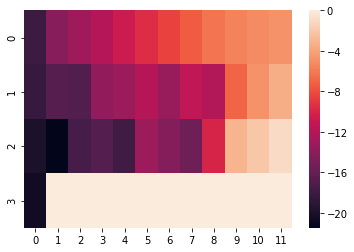

In [9]:
sns.heatmap(np.max(Q, axis=1).reshape((4,12)))